In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import torch


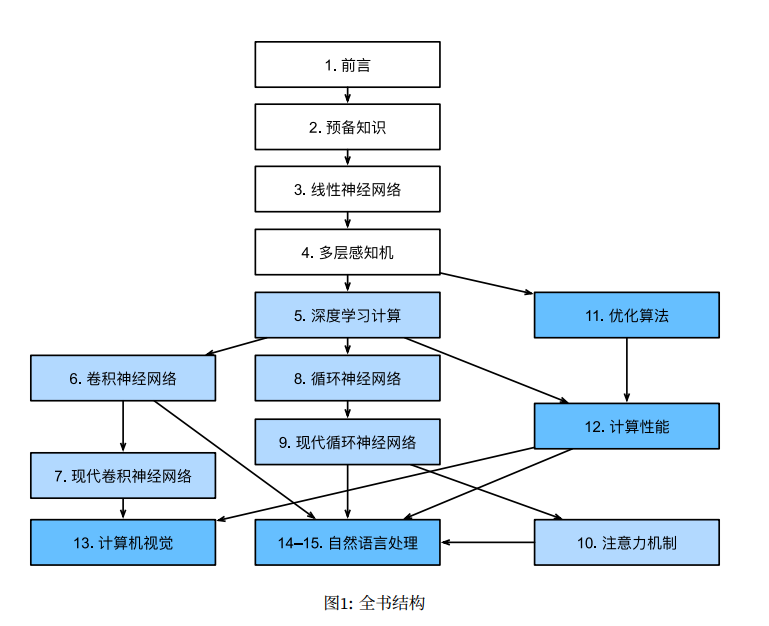

书籍网址：http://zh.d2l.ai/index.html  
讨论区：https://discuss.gluon.ai/  
封装函数网址：https://github.com/d2l-ai/d2l-en/blob/master/d2l/torch.py

# 一 前言

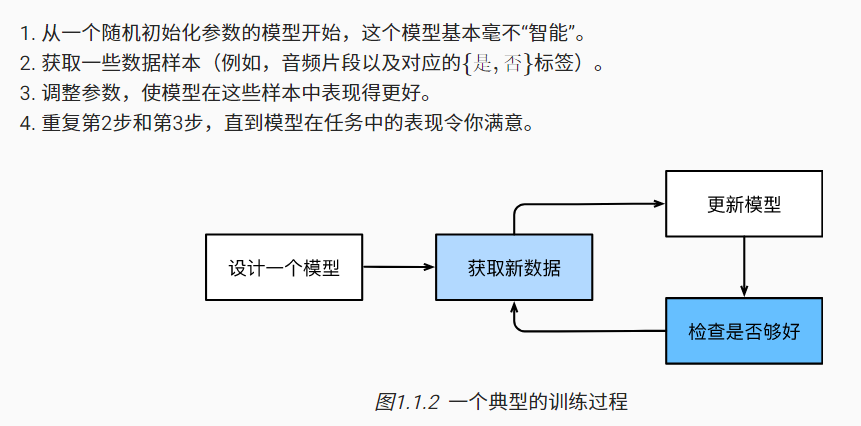

## 1. 概念
### 1.1 数据（data）
数据由样本组成，样本由特征（features）/协变量（covariates）组成，获得样本的特征用于预测标签（labels）/目标（target）
### 1.2 深度学习模型
由神经网络错综复杂的交织在一起，包含层层数据转换
### 1.3 目标函数（objective function）
例如损失函数（loss function）
   需要将数据分成训练集（training set）与测试集（test set），用训练集使目标函数最小，在测试集看其效果。
### 1.4 优化算法：
能够搜索出最佳参数，以最小化损失函数

## 2. 监督学习、无监督学习、强化学习
### 2.1 监督学习
监督学习（supervised learning）的任务是学习一个模型，使模型能够对任意给定的输入，对其相应的输出做出一个好的预测。  

即：利用训练数据集学习一个模型，再用模型对测试样本集进行预测

例如：回归、分类、序列学习

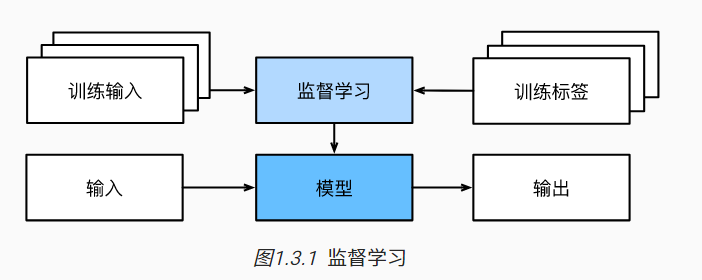

### 2.2 无监督学习
非监督学习（unsupervised learning）为直接对数据进行建模。没有给定事先标记过的训练范例，所用的数据没有属性或标签这一概念。事先不知道输入数据对应的输出结果是什么。

自动对输入的资料进行分类或分群，以寻找数据的模型和规律。

例如：聚类、主成分、因果关系、概率图模型
### 2.3 强化学习

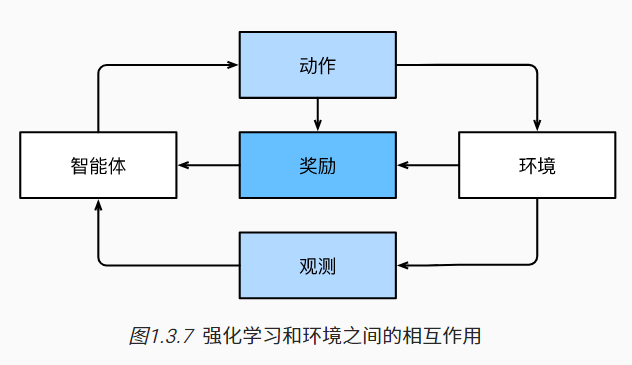

# 二 神经网络的正向传播过程

以分类问题为例说明神经网络正向传播过程，如下例子为两层神经网络。  

来自知乎帖子：https://zhuanlan.zhihu.com/p/65472471

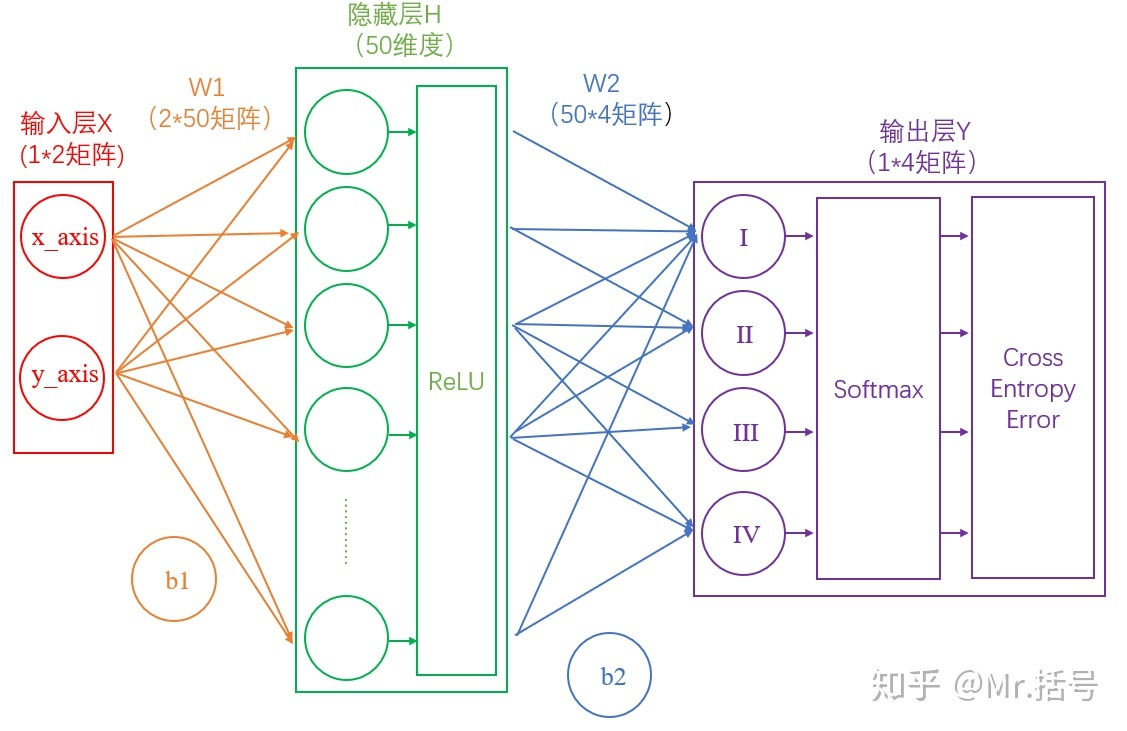

## 1. 从输入层到隐藏层

$$H=X*W1+b1$$

## 2. 从隐藏层到激活层

简而言之，激活层是为矩阵运算的结果添加非线性的。常用的激活函数有三种，分别是阶跃函数、Sigmoid和ReLU。不要被奇怪的函数名吓到，其实它们的形式都很简单，如下图：

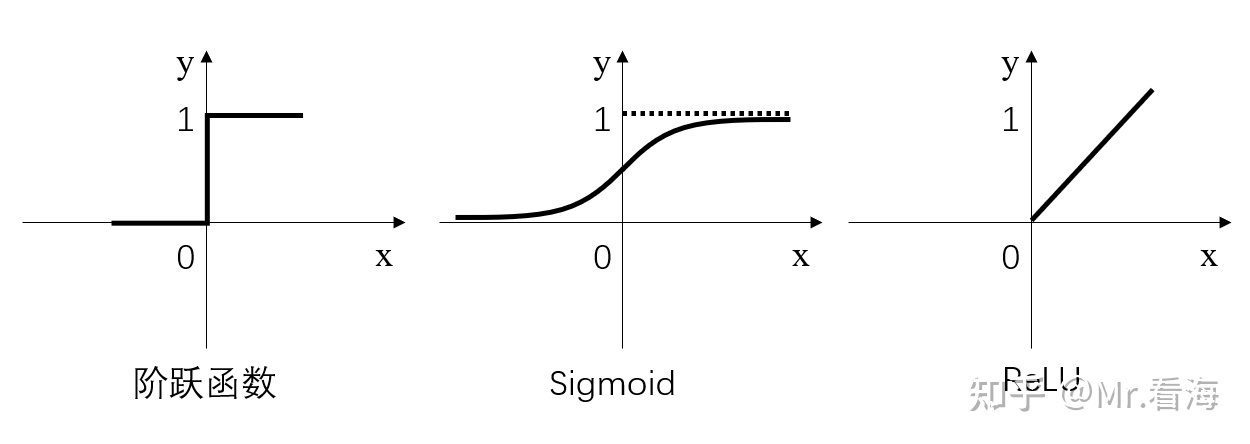

将上面的$H$非线性变化处理

## 3. 从隐藏层到输出层

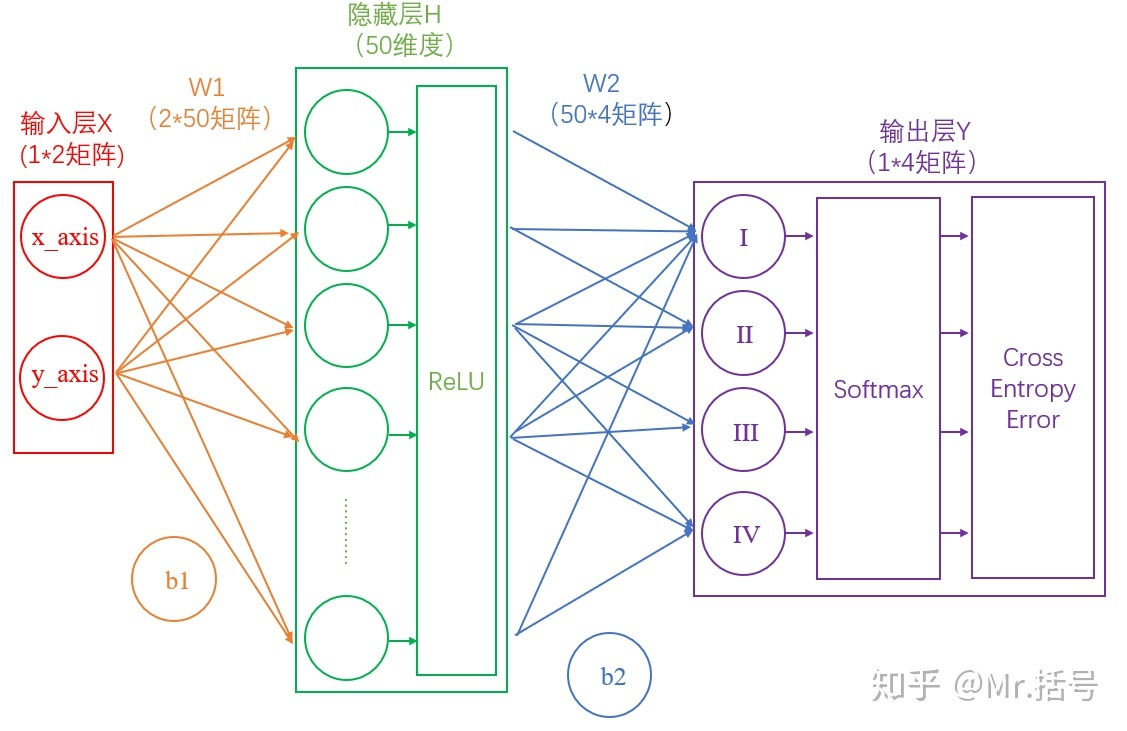

## 4. 输出的正则化Softmax层

$$S_i=\frac{e^i}{\sum_j e^{j}}$$

## 5. 衡量输出的好坏：交叉熵损失（Cross Entropy Error）

$$-log(1-\hat{y}),S_i=1-\hat{y}$$

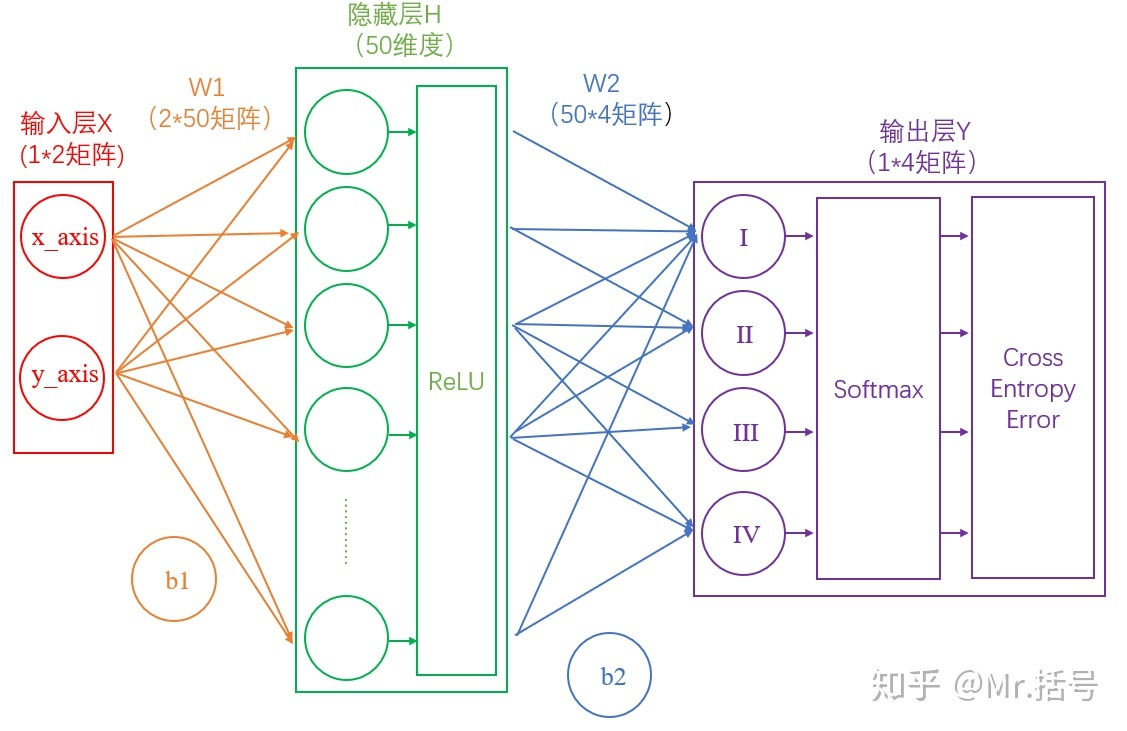

# 三 梯度反向传播过程：Back Propagation

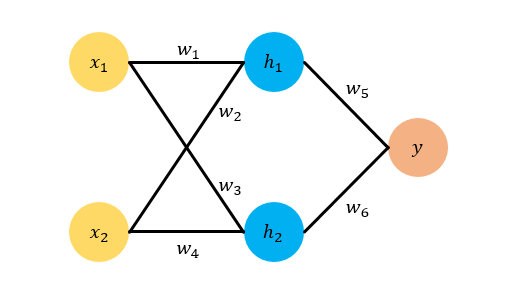

上图展示了一个神经网络。神经网络可以看作是一个函数 $y=fw(x)$，$x$是输入，$y$是输出，$w$是$f$的参数。$w$的真实值是我们的目标，但我们有的只是一些$x$和与之对应的真实的$y=f(x)$的值，所以我们要用到这两个值去估计$w$的真实值。这个问题可以看成下面的优化问题（优化问题即求函数最小值）
$$min\sum_x||f_w(x)-y||^2$$
  
  
$$E = \sum_x||f_w(x)-y||^2$$
梯度下降法：
$$w^+ = w - \eta·\frac{ \partial E }{ \partial w }$$

## 1. 链式法则

$y=g(x),z=f(y)$，有$z=h(x),h=f \circ g$,$h'(x)=\frac{dz}{dy}·\frac{dy}{dx}$

## 2. Back Propagation By Example

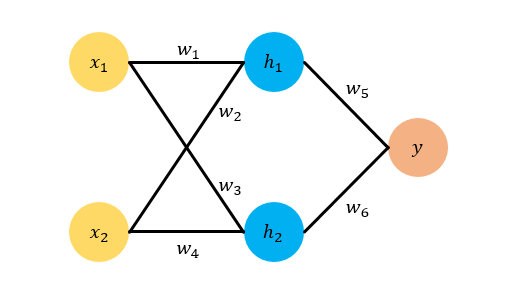

为了直观起见，我们给各个参数赋上具体的数值。我们令$x1=1,x2=0.5$，然后我们令$w1,w2,w3,w4$的真实值分别是$1,2,3,4$，令$w5,w6$的真实值是 $0.5,0.6$。这样我们可以算出$y$的真实目标值是$t=4$。

### 2.1 计算Forward Pass

已知$x_1=1,x_2=0.5,t=4$，设置初始$w=[0.5,1.5,2.3,3,1,1]^T$
$$h_1=w_1x_1+w_2x_2=1.25$$
$$h_2=w_3x_1+w_4x_2=3.8$$
$$y=w_5h_1+w_6h_2=5.05$$
$$E=\frac{1}{2}(y-t)^2=0.55125$$

### 2.2 反向传播 

更新$w_5$:
$$\frac{\partial E}{\partial w_5}=\frac{\partial E}{\partial y}·\frac{\partial y}{\partial w_5}$$
因为：$E=\frac{1}{2}(y-t)^2$，所以
$$\frac{\partial E}{\partial y}=(y-t)=5.05-4=1.05$$
因为：$y=w_5h_1+w_6h_2$，所以
$$\frac{\partial y}{\partial w_5}=h_1=1.25$$
所以
$$\frac{\partial E}{\partial w_5}=\frac{\partial E}{\partial y}·\frac{\partial y}{\partial w_5}=(y-t)h_1=1.05·1.25=1.3125$$

设学习率为0.1，
$$w^+_5 = w_5 - \eta·\frac{ \partial E }{ \partial w_5 }=1-0.1·1.3125=0.86875$$

### 2.3. Pytorch中的自动微分
#### 2.3.1 张量
##### 什么是张量？？怎么通俗地理解张量？ - White Pillow的回答 - 知乎
https://www.zhihu.com/question/23720923/answer/32739132

In [9]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [11]:
torch.randn(3, 4)

tensor([[ 0.8126,  0.9503,  0.6249, -0.0184],
        [-0.1019, -0.5133,  0.2607, -0.1639],
        [ 0.4966,  0.3506,  0.1700,  0.5354]])

In [12]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [13]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

#### 2.3.2 自动微分

In [14]:
x = torch.arange(4.0,requires_grad=True) #requires_grad=True表示backward可以追踪这个参数并且计算它的梯度
x.grad # 默认值为None 

In [15]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [16]:
y = 2 * torch.dot(x, x) 
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [17]:
x1 = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x1, x1) 
y

tensor(28., grad_fn=<MulBackward0>)

In [18]:
x.grad == 4*x

tensor([True, True, True, True])

In [19]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [20]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 在我们的例子中，我们只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

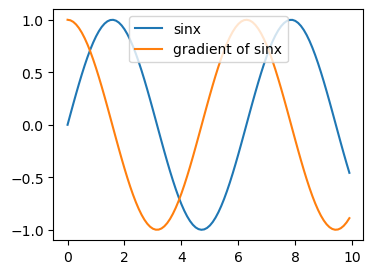

In [21]:
x.grad.zero_()
x = torch.arange(0.0,10.0,0.1)
x.requires_grad_(True)
x1 = x.detach() #detach意味着阻断了x梯度的反向传播，x1=
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.figure(figsize=(4,3))
plt.plot(x1,y1)
plt.plot(x1,x.grad)
plt.legend(['sinx','gradient of sinx'],loc='upper center')